In [0]:
# Este trecho é para harmonizar a execução com ou sem o Google Colab e o Drive com arquivos sincronizado


# Regressão Linear com PyTorch

## Objetivo

Este exemplo utiliza regressão linear para estimar o comprimento das sépalas da íris a partir do seu comprimento das pétalas.
Utiliza-se 
- o cálculo do gradiente automático do PyTorch, porém 
- a função de perda e 
- atualização dos parâmetros é feita de forma explícita.
- A rede é criada com uma camada nn.Linear()

<img src='https://raw.githubusercontent.com/robertoalotufo/files/master/figures/RegressaoLinear_Otimizacao.png' width="500"></a>

## Importação dos pacotes

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from sklearn.datasets import load_iris

import torch
from torch import nn, optim

torch.manual_seed(1234)

## Leitura dos dados

In [14]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = torch.FloatTensor(data[:,0:1])
y_train = torch.FloatTensor(data[:,1:2])

n_samples = x_train.shape[0]
print('x_train.shape:',x_train.shape, x_train.dtype)
print('y_train.shape:',y_train.shape, y_train.dtype)

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: torch.Size([50, 1]) torch.float32
y_train.shape: torch.Size([50, 1]) torch.float32
x_train[:5]:
 tensor([[7.0000],
        [6.4000],
        [6.9000],
        [5.5000],
        [6.5000]])
y_train[:5]:
 tensor([[4.7000],
        [4.5000],
        [4.9000],
        [4.0000],
        [4.6000]])


### Normalização dos dados

In [0]:
xt_min = x_train.min()
xt_max = x_train.max()
x_train_n = (x_train - xt_min)/(xt_max - xt_min)

yt_min = y_train.min()
yt_max = y_train.max()
y_train_n = (y_train - yt_min)/(yt_max - yt_min)


In [0]:
x_train_bias = torch.cat([torch.ones(size=(n_samples,1)), x_train_n],dim=1)

In [17]:
x_train_bias.shape

torch.Size([50, 2])

## Model

<img src='https://raw.githubusercontent.com/robertoalotufo/files/master/figures/RegressaoLinearNeuronio.png' width="400"></a>

In [0]:
model = torch.nn.Linear(2, 1, bias=False)

### Verificando a inicialização dos parâmetros

In [30]:
#model.weight.data = torch.zeros(1,2)
#torch.nn.init.uniform(model.weight.data, -0.1, 0.1)
model.weight.data

tensor([[-0.6247,  0.2838]])

### Testando o predict da rede

In [31]:
model(torch.ones((5,2)))

tensor([[-0.3409],
        [-0.3409],
        [-0.3409],
        [-0.3409],
        [-0.3409]], grad_fn=<MmBackward>)

## Treinamento

In [32]:
num_epochs = 100
learning_rate = 0.3
for epoch in range(num_epochs):
    inputs = x_train_bias
    target = y_train_n

    # forward - predict
    out = model(inputs)

    #loss cálculo da função de perda
    loss = ((out - target)**2).mean()
    
    # backward propagation - cálculo gradiente
    loss.backward()
    
    # gradiente descendente
    model.weight.data = model.weight.data - learning_rate * model.weight.grad.data
    
    # zeragem parâmetros próximo cálculo do gradiente
    model.weight.grad.data.zero_()

    # verbose
    if (epoch) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.item()))

Epoch[1/100], loss: 1.207284
Epoch[21/100], loss: 0.021206
Epoch[41/100], loss: 0.021181
Epoch[61/100], loss: 0.021173
Epoch[81/100], loss: 0.021171


## Avaliação

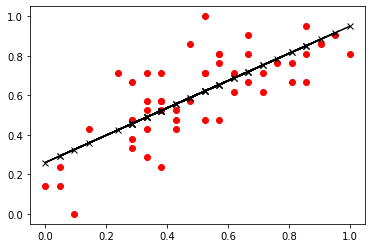

In [33]:
y_pred = model(x_train_bias)
plt.plot(x_train_n, y_train_n, 'ro', label='Original data')
plt.plot(x_train_n, y_pred.data, 'kx-', label='Fitting Line')
plt.show()

### Acessando os parâmetros

In [34]:
w_dic = model.state_dict()
w_dic

OrderedDict([('weight', tensor([[0.2600, 0.6890]]))])

### Parâmetros ótimos, solução analítica

In [35]:
x_bias = x_train_bias
y = y_train_n
x_bias_t = torch.t(x_bias)
w_opt = (torch.inverse(x_bias_t.mm(x_bias)).mm(x_bias_t)).mm(y)
print(torch.t(w_opt))

tensor([[0.2613, 0.6865]])


# Exercícios

- 1) Qual é o shape de `loss`? Por que no final da varredura do laço de treinamento, a perda é impressa utilizando
   `loss.item()`? 
   

- 2) Calcule e imprima o valor da perda (MSE) fazendo o predict da rede com os pesos já
   treinados.

- 3) Crie uma lista de tuplas `(w0,w1)` para guardar a evolução dos valores dos
   parâmetros durante o laço de treinamento.
   Plote num gráfico tipo **scatter plot** para visualizar a variação 
   dos parâmetros.
   Marque neste gráfico o valor ótimo do parâmetro dado pela solução
   analítica.

- 4) Reescreva o mesmo exemplo, porém agora usando o `bias=True` do `nn.Linear``

# Aprendizados